In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\research_theory\SARCOV.csv',index_col='Date_reported',parse_dates=True)


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify inf

<AxesSubplot:xlabel='Date_reported'>

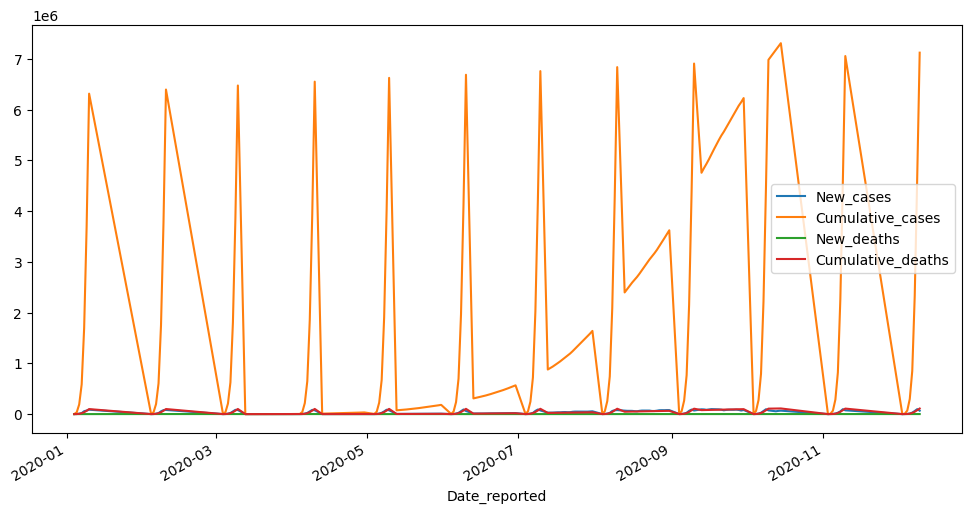

In [55]:
df.plot(figsize=(12,6))


In [56]:
len(df)
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-11-03,IN,India,SEARO,10,60,0,0
2020-12-03,IN,India,SEARO,13,73,0,0
2020-03-13,IN,India,SEARO,8,81,1,1
2020-03-14,IN,India,SEARO,3,84,1,2
2020-03-15,IN,India,SEARO,23,107,0,2
...,...,...,...,...,...,...,...
2020-11-10,IN,India,SEARO,74383,7053806,918,108334
2020-12-10,IN,India,SEARO,66732,7120538,816,109150
2020-10-13,IN,India,SEARO,55342,7175880,706,109856


In [57]:


df = df.drop('Country_code',axis='columns')
df = df.drop('Country',axis='columns')
df= df.drop('WHO_region',axis='columns')
df= df.drop('Cumulative_cases',axis='columns')
df = df.drop('New_deaths',axis='columns')
df= df.drop('Cumulative_deaths',axis='columns')
df.columns[df.isna().any()]
train_size=len(df)
x = df.iloc[:train_size-30]
y= df.iloc[train_size-30:]
y

,New_cases
Date_reported,
2020-09-16,90123
2020-09-17,97894
2020-09-18,96424
2020-09-19,93337
2020-09-20,92605
2020-09-21,86961
2020-09-22,75083
2020-09-23,83347
2020-09-24,86508


In [58]:

df.columns[df.isna().any()]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:

df.head(),df.tail()



(               New_cases
 Date_reported           
 2020-11-03            10
 2020-12-03            13
 2020-03-13             8
 2020-03-14             3
 2020-03-15            23,
                New_cases
 Date_reported           
 2020-11-10         74383
 2020-12-10         66732
 2020-10-13         55342
 2020-10-14         63509
 2020-10-15         67708)

In [60]:
y


,New_cases
Date_reported,
2020-09-16,90123
2020-09-17,97894
2020-09-18,96424
2020-09-19,93337
2020-09-20,92605
2020-09-21,86961
2020-09-22,75083
2020-09-23,83347
2020-09-24,86508


In [61]:
scaler.fit(x)
scaled_train = scaler.transform(x)
scaled_test = scaler.transform(y)

In [62]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 15
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [64]:
import tensorflow as tf

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(1, 1),stateful=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

# fit model
model.fit(generator,epochs=15)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
174/174 [==============================] - 2s 6ms/step - loss: 0.0163
Epoch 2/15
174/174 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 3/15
174/174 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 4/15
174/174 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 5/15
174/174 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 6/15
174/174 [================

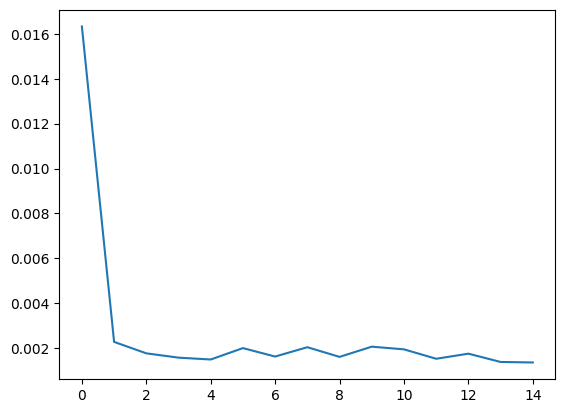

In [65]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [66]:


last_train_batch = scaled_train[-15:]
last_train_batch

array([[0.71661525],
       [0.80307891],
       [0.85971691],
       [0.85416176],
       [0.88584255],
       [0.92888989],
       [0.93063228],
       [0.77696352],
       [0.91939898],
       [0.98119241],
       [0.98955589],
       [1.        ],
       [0.96722252],
       [0.94363873],
       [0.85895846]])

In [67]:

model.predict(last_train_batch)
     

1/1 [==============================] - 0s 183ms/step


array([[0.13881844],
       [0.14635412],
       [0.15132023],
       [0.1508321 ],
       [0.15361892],
       [0.15741734],
       [0.15757138],
       [0.14407223],
       [0.1565787 ],
       [0.1620499 ],
       [0.16279195],
       [0.16371934],
       [0.16081114],
       [0.15872186],
       [0.15125358]], dtype=float32)

In [68]:
scaled_test[0]
   

array([0.92367296])

In [69]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(y)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 68ms/step


In [70]:
test_predictions


[array([0.87704265], dtype=float32),
 array([0.87124956], dtype=float32),
 array([0.86355007], dtype=float32),
 array([0.85519904], dtype=float32),
 array([0.84703314], dtype=float32),
 array([0.8387694], dtype=float32),
 array([0.8304499], dtype=float32),
 array([0.82291776], dtype=float32),
 array([0.8168257], dtype=float32),
 array([0.8095135], dtype=float32),
 array([0.80165195], dtype=float32),
 array([0.79373443], dtype=float32),
 array([0.78573793], dtype=float32),
 array([0.7781508], dtype=float32),
 array([0.77090037], dtype=float32),
 array([0.76441854], dtype=float32),
 array([0.75784564], dtype=float32),
 array([0.7513914], dtype=float32),
 array([0.74508005], dtype=float32),
 array([0.738918], dtype=float32),
 array([0.7329108], dtype=float32),
 array([0.72706336], dtype=float32),
 array([0.72136945], dtype=float32),
 array([0.71581703], dtype=float32),
 array([0.7103893], dtype=float32),
 array([0.7050956], dtype=float32),
 array([0.6999401], dtype=float32),
 array([0.694

In [71]:
y.head()


,New_cases
Date_reported,
2020-09-16,90123
2020-09-17,97894
2020-09-18,96424
2020-09-19,93337
2020-09-20,92605


In [72]:
true_predictions = scaler.inverse_transform(test_predictions)

     

In [73]:
y['Predictions'] = true_predictions
     

C:\Users\HP\AppData\Local\Temp\ipykernel_7224\506440522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date_reported'>

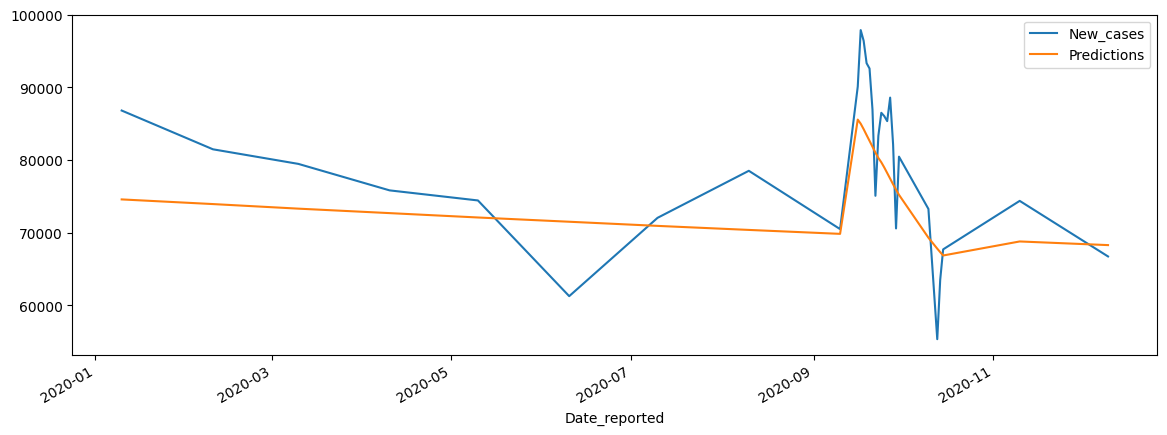

In [74]:
y.plot(figsize=(14,5))


In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y['New_cases'], y['Predictions']))


In [76]:
print(rmse)

7333.8417163247195


In [77]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
print(mape(y['New_cases'], y['Predictions']))

0.08014958745766772


In [78]:
def smape(act,forc):
    return 100/len(act) * np.sum(2 * np.abs(forc - act) / (np.abs(act) + np.abs(forc)))
result = smape(y['New_cases'], y['Predictions'])
print(result)

8.159965461361868


In [79]:
 y['Predictions']


Date_reported
2020-09-16    85573.420347
2020-09-17    85008.205483
2020-09-18    84256.989382
2020-09-19    83442.204636
2020-09-20    82645.482667
2020-09-21    81839.211735
2020-09-22    81027.503361
2020-09-23    80292.617033
2020-09-24    79698.231890
2020-09-25    78984.804559
2020-09-26    78217.776259
2020-09-27    77445.287255
2020-09-28    76665.092785
2020-09-29    75924.838800
2020-09-30    75217.436272
2020-01-10    74585.023925
2020-02-10    73943.725576
2020-03-10    73314.005780
2020-04-10    72698.225610
2020-05-10    72097.013132
2020-06-10    71510.909185
2020-07-10    70940.390633
2020-08-10    70384.852672
2020-09-10    69843.120580
2020-10-10    69313.554402
2020-11-10    68797.061348
2020-12-10    68294.054313
2020-10-13    67804.527484
2020-10-14    67328.428520
2020-10-15    66865.350340
Name: Predictions, dtype: float64

In [80]:
m1=max(y['New_cases'])
m2=min(y['New_cases'])
diff=m1-m2
print(diff)
print(m2)


42552
55342
